----------------------------------------------------

# VISUALIZING THE DATA

In [2]:
#import the relevant libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#load our data
df = pd.read_csv("../data/heart_disease_health_indicators_BRFSS2015.csv", delimiter=",")

<Axes: ylabel='Frequency'>

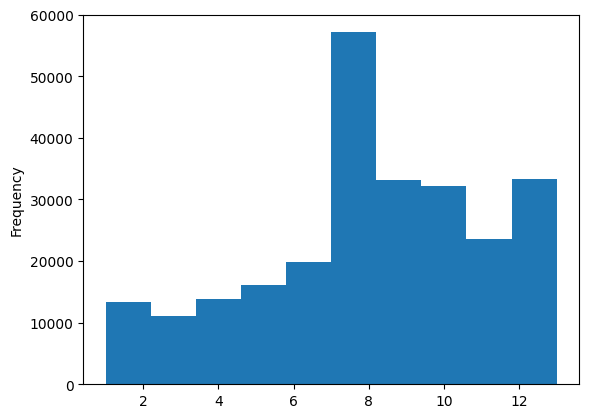

In [3]:
ageDistribution = df['Age']

ageDistribution.plot(kind="hist")

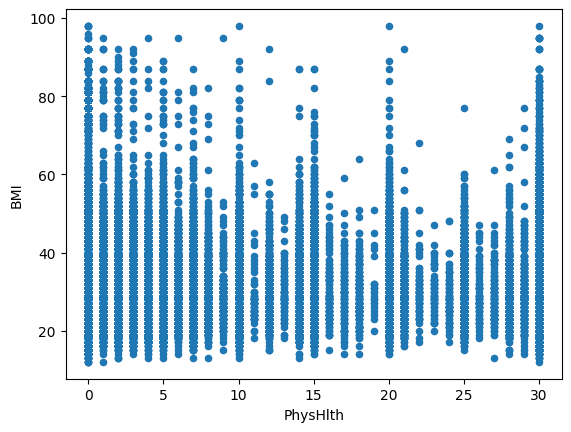

In [4]:
df.plot(x='PhysHlth', y='BMI', kind='scatter')

plt.show()

## Remarks

Our data isn't too suitable for scatterplots, which are meant to show density, but you need the values to be a wide range of numbers. In our case appart from the BMI, PhysHealth, MentHealth everything else is in pretty tight ranges.

<Axes: >

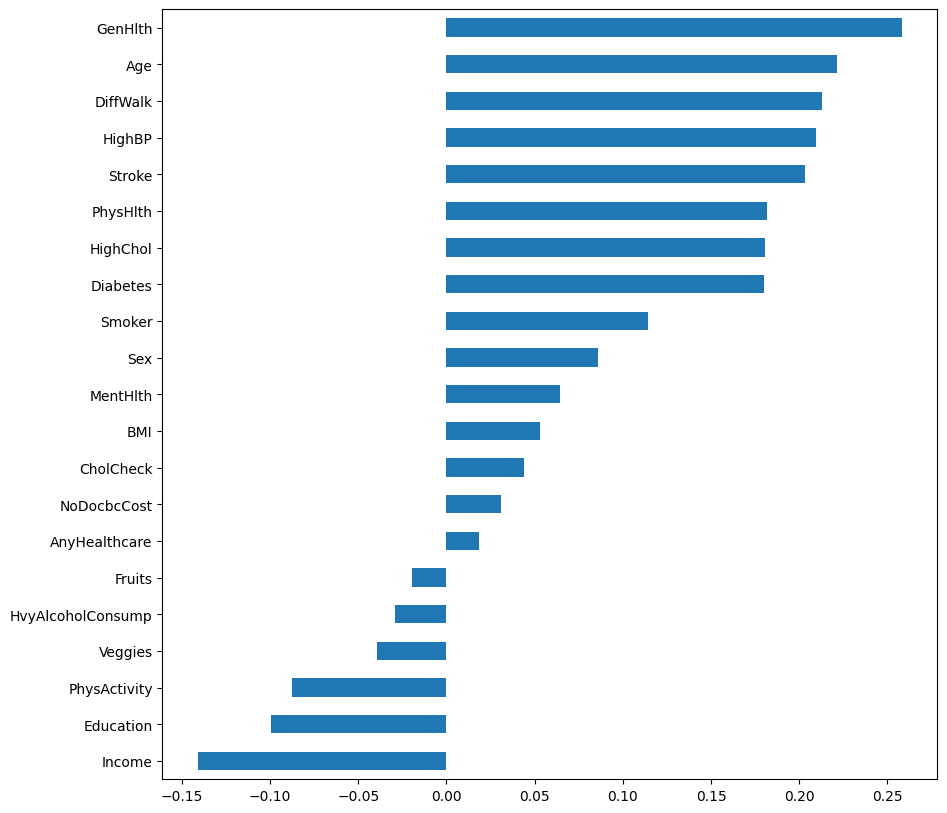

In [5]:
df.drop('HeartDiseaseorAttack', axis=1).corrwith(df.HeartDiseaseorAttack).sort_values().plot(kind='barh', figsize=(10, 10))

<Axes: xlabel='Age,Smoker'>

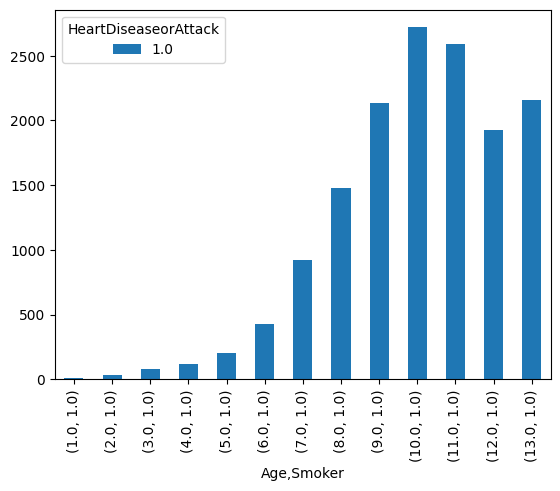

In [6]:
# Dataframe where heart disease is 1, i.e. all people who have heart disease.
hasHD = df['HeartDiseaseorAttack'] == 1

# Dataframe where smoker is 0, i.e. all people who smoke.
isSmoker = df['Smoker'] == 1

# Dataframe for all smokers who have heart disease.
hDAndSmoker = df[hasHD & isSmoker]

df1 = hDAndSmoker.groupby(['Age', 'Smoker', 'HeartDiseaseorAttack'])

df1.size().unstack().plot(kind='bar', stacked=False)

## Remarks

This diagram shows the relationship between smoking, age and heart disease. It can be seen that smokers from the age of 50 and up are more likely to get heart attack or disease. 

<Axes: >

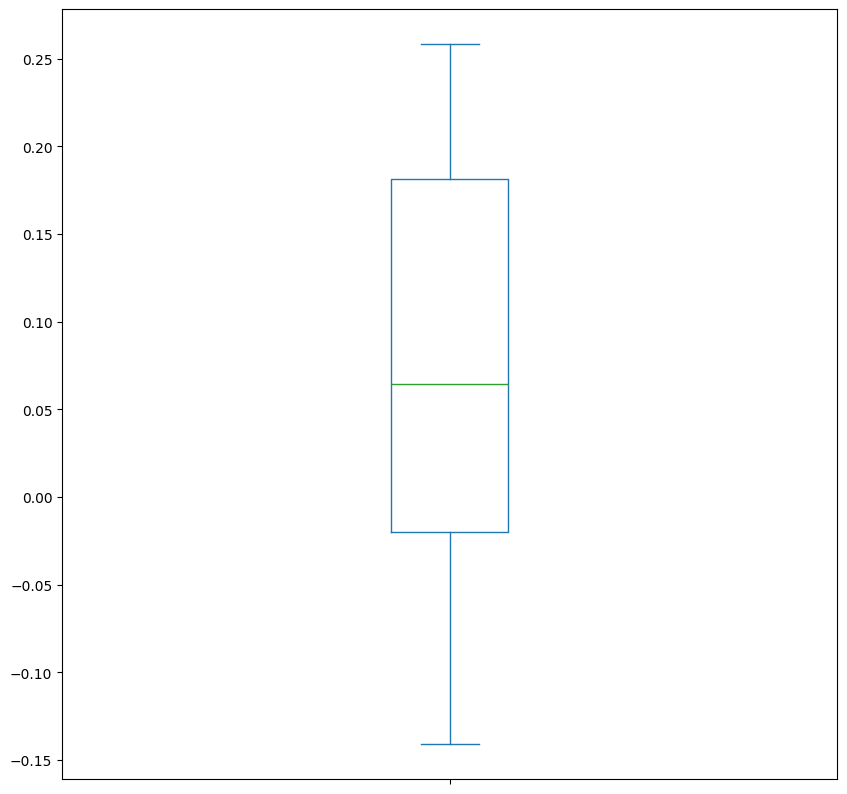

In [9]:
df.drop('HeartDiseaseorAttack', axis=1).corrwith(df.HeartDiseaseorAttack).sort_values().plot(kind='box', figsize=(10, 10))

In [ ]:
df_filtered = df[df['heartdiseaseorattack'] == 1]

for column in df_filtered.columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df_filtered[column])
    plt.title(f'Boxplot of {column}')
    plt.show()